In [45]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as snc

In [2]:
#reading csv file
df= pd.read_csv('mushrooms.csv')

In [5]:
#checking the first five rows of the data
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
#checking number of rows and columns
df.shape

(8124, 23)

In [8]:
#checking nan values
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Great!!! No NAN value

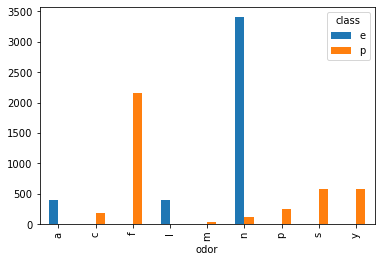

In [10]:
#based on frequency, lets see what 'odor' says the mushroom edibility
pd.crosstab(df['odor'], df['class']).plot(kind='bar')

The plot above shows that mushrooms with no odor are much more edible

In [15]:
#encoding data 
new_df= df.select_dtypes(include='object')
variables= new_df.columns

for i in variables:
    new_df[i]= new_df[i].astype('category')
    new_df[i]= new_df[i].cat.codes

In [16]:
new_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [18]:
#splitting data to I.V and D.V
X= new_df.drop('class', axis= 'columns')
X.shape

(8124, 22)

In [19]:
y= new_df['class']
y.shape

(8124,)

In [26]:
#splitting data to train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X,y, test_size= .20)

In [32]:
#importing model module
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()

In [35]:
#fitting train set
model.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
#testing model with the testing set
predictions= model.predict(x_test)
predictions

array([0, 0, 0, ..., 1, 0, 0], dtype=int8)

In [37]:
#checking model accuracy
model.score(x_test, y_test)

0.9476923076923077